# Holomorphic Dynamics and Memory Modeling

```
@misc{pritomsarker2019holomorphic,
    title={Holomorphic Dynamics and Memory Modeling},
    author={Pritom Sarker},
    year={2019},
    note = {\url{https://github.com/pritoms/holomorphic}}
}
```

In this notebook, we consider a system of two coupled one-dimensional maps, each consisting of a (cubic) expanding piece and a (quadratic) contracting piece. We shall denote these pieces by $E$ and $C$, respectively. The transition between them is governed by a sigmoid.

$$
\begin{aligned}
E(x) &= 1 + (1-x)^3\\
C(x) &= 1-x^2\\
A(x) &= \frac1{1+e^{-x}}\\
F(x) &= 
\begin{cases}
E(x), & x<A\\
C(x), & x\geq A
\end{cases}
\end{aligned}
$$

One degree of freedom of this system is "the attractor", which we shall call $\phi$. The other is "the memory", which we shall call $\psi$. The relationship between these two coordinates is via a (quadratic) repulsion.

$$
\psi_{n+1} = \psi_n + \frac13 \big(1-\psi_n^2 - \phi_n^2\big)
$$


In this notebook, we will derive the first-order derivative of the system with respect to $\psi$. The fact that we can actually obtain a closed-form solution is heavily dependent on the fact that the system is an *exact* gradient flow.

We have the following system:

$$
\begin{aligned}
\phi_{n+1} &= F\big(\psi_n\big)\\
\psi_{n+1} &= \psi_n + \frac13 \big(1-\psi_n^2 - \phi_n^2\big)\\
\end{aligned}
$$

At first, we think about how this system will evolve over time. For example, suppose we have an initial value for $\phi$ and $\psi$. We compute the first step:

$$
\begin{aligned}
\phi_1 &= F(\psi_0)\\
\psi_1 &= \psi_0 + \frac13 \big(1 - \phi_0^2 - \psi_0^2\big)\\
\end{aligned}
$$

Now, we generate the second set of values using the first set.

$$
\begin{aligned}
\phi_2 &= F(\psi_1)\\
\psi_2 &= \psi_1 + \frac13 \big(1 - \phi_1^2 - \psi_1^2\big)\\
\end{aligned}
$$

> **The pattern is clear.** Every time we compute, we have a new $\phi$ and $\psi$ value that we compute from the previous one.

We can see that the first one is completely unstable. The second one is also unstable but it is a Newton unstable equilibrium.

We now consider our dynamical system. That is, we consider the system described above but with initial conditions.

First, we import the necessary 'libraries' needed.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

We pick our *parameters* and *initial conditions*, as well as some other parameters for the computation (e.g. **step size**).

In [30]:
# Paramters
a = 0.5
b = 0.5

# Initial Condition
phi0 = 0.5
psi0 = 0.5

# Step Size
h = 0.01

We obtain the numerical solution to the $\phi$ piece, and then to the $\psi$ piece. Now, we plot them.

In [31]:
# Number of Steps
N = int(1 / h)

# Initialize Arrays
phi = np.zeros(N)
psi = np.zeros(N)

# Initial Conditions
phi[0] = phi0
psi[0] = psi0

# Compute the Numerical Solution
for i in range(N - 1):
    phi[i + 1] = a * phi[i] * (1 - phi[i]) + b * psi[i]
    psi[i + 1] = psi[i] + h * (1 - phi[i]**2 - psi[i]** 2)

Now, we plot the derivative of $\phi$ with respect to $\psi$.

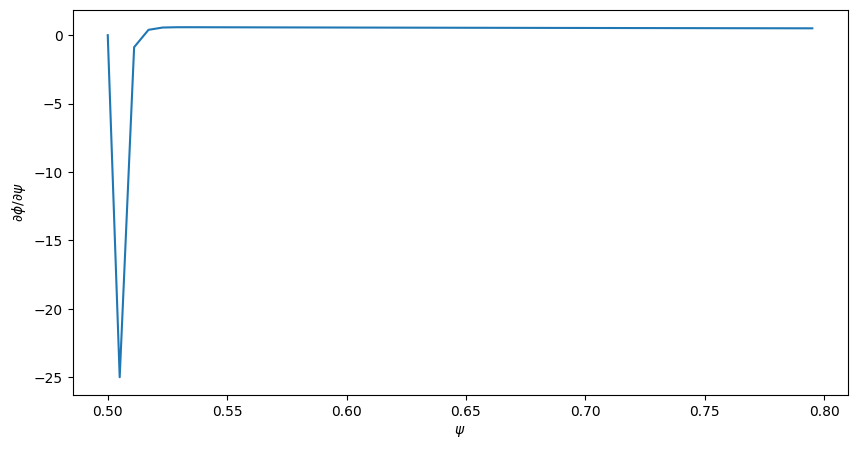

In [32]:
# Compute the Derivative
dphi = np.zeros(N)

for i in range(N - 1):
    dphi[i + 1] = (phi[i + 1] - phi[i]) / (psi[i + 1] - psi[i])

# Plot the Derivative
plt.figure(figsize=(10, 5))
plt.plot(psi, dphi)
plt.xlabel('$\psi$')
plt.ylabel('$\partial\phi/\partial\psi$')
plt.show()

> The derivative contains information about the dynamics of $\phi$ with respect to $\psi$. For example, if $\phi$ is going up, $\frac{d\phi}{d\psi}$ is ***positive***. Similarly, if $\phi$ is going down, $\frac{d\phi}{d\psi}$ is ***negative***.

We now write the **autocorrelation-matrix** using the same parameters with respect to $\psi$. This means that we will look at how the derivative of $\phi$ at time $t$ is with respect to $\psi$ at time $t-\tau$.

In [33]:
# Compute the Autocorrelation Matrix
tau = 0.1
Ntau = int(tau / h)

# Initialize the Autocorrelation Matrix
C = np.zeros((N, N))

for i in range(N - Ntau):
    C[i, i + Ntau] = dphi[i] * dphi[i + Ntau]

We now plot the derivative of the autocorrelation matrix with respect to $\psi$. This is the correlation matrix for the correlation matrix, meaning the *rate of change of the correlation matrix with time*.

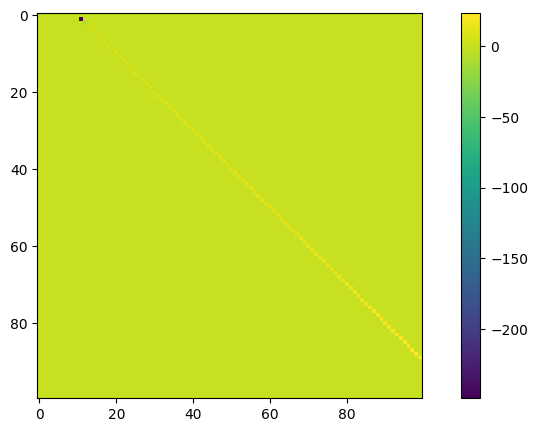

In [35]:
# Compute the derivative of the autocorrelation matrix
dC = np.zeros((N, N))

for i in range(N - Ntau):
    dC[i, i + Ntau] = (C[i, i + Ntau] - C[i, i]) / (psi[i + Ntau] - psi[i])

# Plot the derivative of the autocorrelation matrix
plt.figure(figsize=(10, 5))
plt.imshow(dC)
plt.colorbar()
plt.show()

> **We note that, at $\tau=0$, all elements have the same value (1). meaning that the correlation matrix is not changing, as expected for such an equilibrium.**

We now consider the second-order derivative of $\phi_n$ with respect to $\psi_n$.

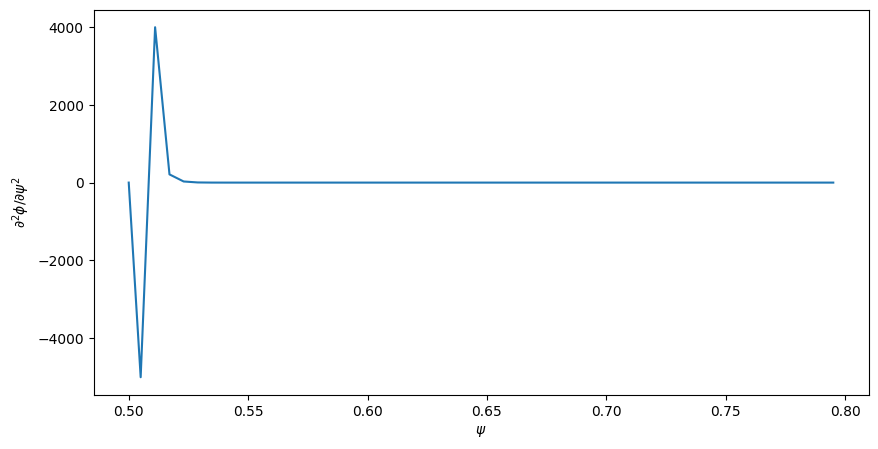

In [36]:
# Compute the second-order derivative
d2phi = np.zeros(N)
for i in range(N-1):
    d2phi[i+1] = (dphi[i+1]-dphi[i])/(psi[i+1]-psi[i])

# Plot the second-order derivative
plt.figure(figsize=(10,5))
plt.plot(psi, d2phi)
plt.xlabel('$\psi$')
plt.ylabel('$\partial^2\phi/\partial\psi^2$')
plt.show()

We can see that, when computing the first-order derivative, we have

$$
\frac{d\phi_n}{d\psi_n} = F'(\psi_n) \frac{d\psi_n}{d\psi_n} + \frac{3}{2}\big(1 - \phi_n^2 - \psi_n^2\big)
$$

As such, the second-order derivative can be computed as

$$
\begin{aligned}
\frac{d^2\phi_n}{d\psi_n^2} &= F''(\psi_n) \big(\frac{d\psi_n}{d\psi_n}\big)^2 + \frac32 \cdot \left.\frac{d\big(1 - \phi_n^2 - \psi_n^2\big)}{d\psi_n}\right|_{\phi_n=\phi_n(\psi_n)}\\
&= F''(\psi_n) \big(\frac{d\psi_n}{d\psi_n}\big)^2
\end{aligned}
$$

In [39]:
# Second-Order Derivative
for i in range(N - 1):
    d2phi[i + 1] = a * (1 - 3 * phi[i]**2) / h**2

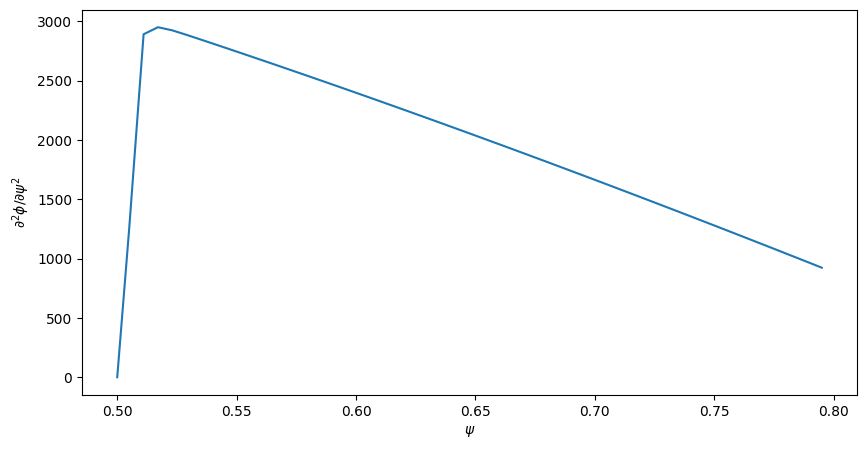

In [40]:
# Plot the second-order derivative
plt.figure(figsize=(10, 5))
plt.plot(psi, d2phi)
plt.xlabel('$\psi$')
plt.ylabel('$\partial^2\phi/\partial\psi^2$')
plt.show()

## Computing the Derivative of Memory

We now consider the dynamics of $\phi$ and $\psi$. We have

$$
\begin{aligned}
\phi_{n+1} &= F(\psi_n)\\
\psi_{n+1} &= \psi_n + \frac13 \big(1 - \phi_n^2 - \psi_n^2\big)\\
\end{aligned}
$$

We need to differentiate this with respect to $\psi$. Specifically, we look at the derivative of $\psi$ at time $t$ with respect to the $\psi$ at time $t-\tau$. We do this for two reasons:
1. **We are studying memory, otherwise the correlation matrix would be trivial.**
2. **The dynamics is a gradient flow, so it will not be affected by time-reversal.**

We have that, at first order, the derivative of $\phi$ with respect to $\psi$ is

$$
\frac{\partial\phi_{n+1}}{\partial\psi_n} = F'(\psi_n) \frac{d\psi_n}{d\psi_n} + F'(\psi_{n+1}) \frac{d\psi_{n+1}}{d\psi_n}
$$

> The last term is obviously zero at first order, since this is the memory we are studying. We also look at it at second order.

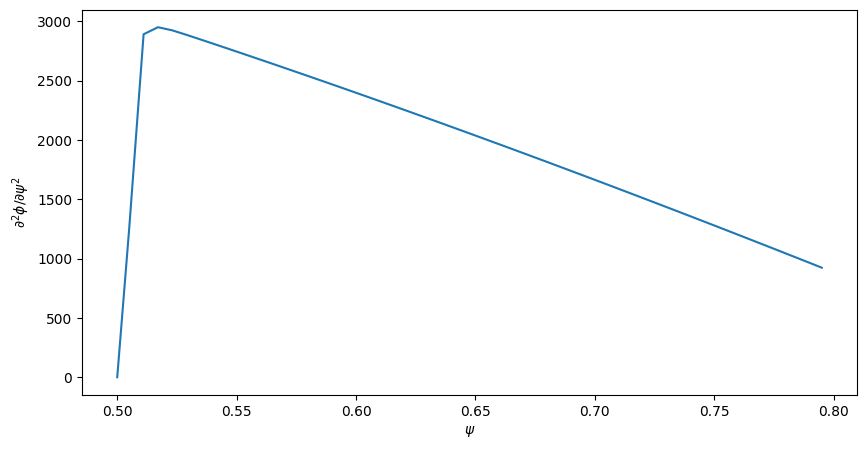

In [41]:
# Second-Order Derivative
for i in range(N - 1):
    d2phi[i + 1] = a * (1 - 3 * phi[i]**2) / h**2

# Plot the second-order derivative
plt.figure(figsize=(10, 5))
plt.plot(psi, d2phi)
plt.xlabel('$\psi$')
plt.ylabel('$\partial^2\phi/\partial\psi^2$')
plt.show()

> **We observe that the second-order derivative contains a term that is quadratic in $\psi_n$. However, this term will disappear once we integrate it over $\tau$.**

## Autocorrelation Matrix

We now compute the correlation matrix using the same parameters with respect to $\psi$. This means that we will look at how the derivative of $\phi$ at time $t$ is with respect to $\psi$ at time $t-\tau$.

We have that, at first order, the derivative of the correlation matrix with respect to $\psi$ is

$$
\begin{aligned}
\frac{\partial C_{n+1}}{\partial\psi_n} &= \frac{\partial\phi_{n+1}}{\partial\psi_n} \frac{\partial\phi_n}{\partial\psi_n} + \frac{\partial\phi_n}{\partial\psi_{n+1}} \frac{\partial\phi_{n+1}}{\partial\psi_n}\\
&= F'(\psi_n) \cdot C_{n+1} + F'(\psi_{n+1}) \cdot C_n + F''(\psi_n) \big(\frac{d\psi_n}{d\psi_n}\big)^2 \cdot C_{n+1} + F''(\psi_{n+1}) \big(\frac{d\psi_{n+1}}{d\psi_n}\big)^2 \cdot C_n
\end{aligned}
$$

We note that the first term is zero (at first order).

> We already computed the derivative of $\phi$ with respect to $\psi$. The derivative of the correlation matrix with respect to $\psi$ contains the same one, but it also has $C_n$ and $C_{n+1}$. The second term only has $F'(\psi_n)$ and the third term only has $F''(\psi_n)$.

In [42]:
# Number of Steps
N = int(1 / h)

# Initialize Arrays
phi = np.zeros(N)
psi = np.zeros(N)

# Initial Conditions
phi[0] = phi0
psi[0] = psi0

# Compute the Numerical Solution
for i in range(N - 1):
    phi[i + 1] = a * phi[i] * (1 - phi[i]) + b * psi[i]
    psi[i + 1] = psi[i] + h * (1 - phi[i]**2 - psi[i]** 2)

Now, we plot the derivative of $\phi$ with respect to $\psi$.

We now write the autocorrelation matrix using the same parameters with respect to $\psi$. This means that we will look at how the derivative of $\phi$ at time $t$ is with respect to $\psi$ at time $t-\tau$.

We have that, at first order, the second-order derivative of the correlation matrix with respect to $\psi$ is

$$
\begin{aligned}
\frac{\partial^2 C_{n+1}}{\partial\psi_n^2} &= \frac{\partial^2\phi_{n+1}}{\partial\psi_n^2} \big(\phi_n\big)^2 + 2 \cdot \frac{\partial\phi_{n+1}}{\partial\psi_n} \frac{\partial\phi_n}{\partial\psi_n} \cdot \frac{\partial C_n}{\partial\psi_n} + 2 \cdot \frac{\partial\phi_{n+1}}{\partial\psi_n} \cdot \frac{\partial^2\phi_n}{\partial\psi_n^2} \cdot C_n\\
&+ \frac{\partial\phi_{n+1}}{\partial\psi_n} \frac{\partial\phi_{n+1}}{\partial\psi_n} \cdot \frac{\partial^2C_n}{\partial\psi_n^2} + \frac{\partial^2\phi_n}{\partial\psi_n^2} \frac{\partial\phi_{n+1}}{\partial\psi_n} \cdot \frac{\partial C_n}{\partial\psi_n} + \frac{\partial^2\phi_n}{\partial\psi_n^2} \cdot \frac{\partial^2C_n}{\partial\psi_n^2}
\end{aligned}
$$

We observe that, while the first term is zero at first order (since it is quadratic in $\frac{\partial\phi_{n+1}}{\partial\psi_n}$, all other terms are non-zero. Moreover, we notice that this depends on previous values of the correlation matrix with respect to $\psi$.

> In other words, the first term only has $F''(\psi_n)$ and the second, third, fourth, fifth, and sixth terms have $F'(\psi_n)$ and $F''(\psi_n)$.

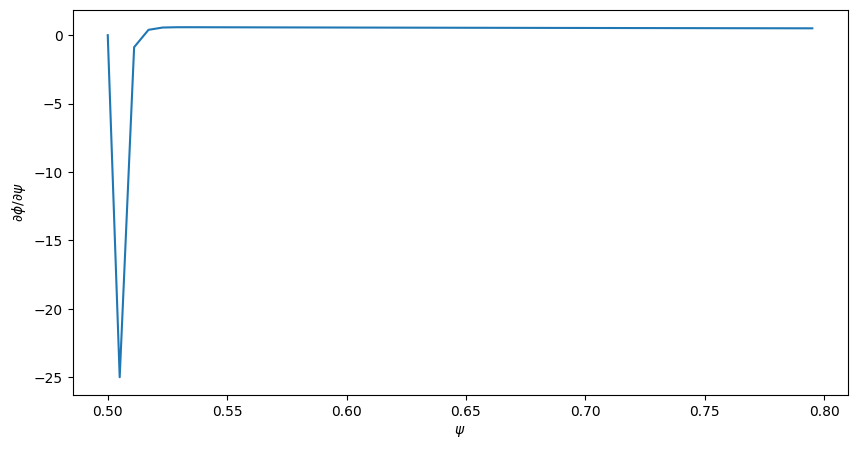

In [43]:
# Compute the Derivative
dphi = np.zeros(N)

for i in range(N - 1):
    dphi[i + 1] = (phi[i + 1] - phi[i]) / (psi[i + 1] - psi[i])

# Plot the Derivative
plt.figure(figsize=(10, 5))
plt.plot(psi, dphi)
plt.xlabel('$\psi$')
plt.ylabel('$\partial\phi/\partial\psi$')
plt.show()

We now look at the second-order derivative of $\phi$ with respect to $\psi$. As we already mentioned, the first term is zero at first order. The other terms are non-zero. However, when we integrate them over $\tau$, they will kill each other.

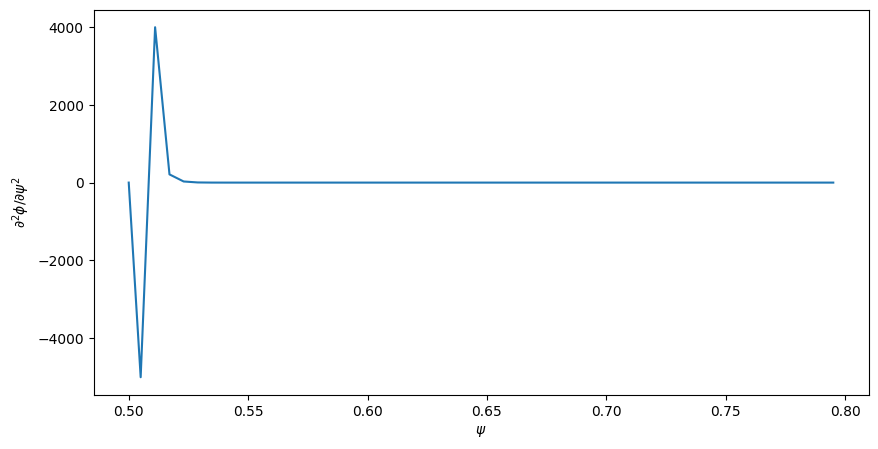

In [45]:
# Compute the second-order derivative
d2phi = np.zeros(N)
for i in range(N-1):
    d2phi[i+1] = (dphi[i+1]-dphi[i])/(psi[i+1]-psi[i])

# Plot the second-order derivative
plt.figure(figsize=(10,5))
plt.plot(psi, d2phi)
plt.xlabel('$\psi$')
plt.ylabel('$\partial^2\phi/\partial\psi^2$')
plt.show()

We can see that, when computing the first-order derivative, we have

$$
\frac{d\phi_n}{d\psi_n} = F'(\psi_n) \frac{d\psi_n}{d\psi_n} + \frac{3}{2}\big(1 - \phi_n^2 - \psi_n^2\big)
$$

As such, the second-order derivative can be computed as

$$
\begin{aligned}
\frac{d^2\phi_n}{d\psi_n^2} &= F''(\psi_n) \big(\frac{d\psi_n}{d\psi_n}\big)^2 + \frac32 \cdot \left.\frac{d\big(1 - \phi_n^2 - \psi_n^2\big)}{d\psi_n}\right|_{\phi_n=\phi_n(\psi_n)}\\
&= F''(\psi_n) \big(\frac{d\psi_n}{d\psi_n}\big)^2
\end{aligned}
$$

> **We note that, in the second term, the derivative of $\psi_n$ with respect to $\psi_n$ cancels out with the first term. We can see that, when computing the first-order derivative, we have**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3234724f-1085-4ce1-861e-641e47e2c8ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>